<a href="https://colab.research.google.com/github/Joaoluislins/us_insurance_costs/blob/main/US_Insurance_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Insurance Costs project

I'm excited, this is my first portfolio project! It's part of the Data Scientist career course at Codacademy.

The objective of the project is to build a python algorithm to analyze data on US Insurance Costs, no framework was given and I can choose whatever aspects I want to focus into.



### Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

### First inspection on the dataset

In [ ]:
insurance_data.info()
insurance_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## What am I going to analyze?

The data consists of 1338 rows and 7 columns, each of which a variable, categorical nominals and quantitative discret/continu. Each row, a person's personal data:

*   age
*   sex
*   bmi
*   children
*   smoker
*   region
*   charges

6 features that influence the charge cost.

I can do first some statis, aggregate by to calculate averages, percentages and relations between variables such as averages, stardard deviations and frequency.




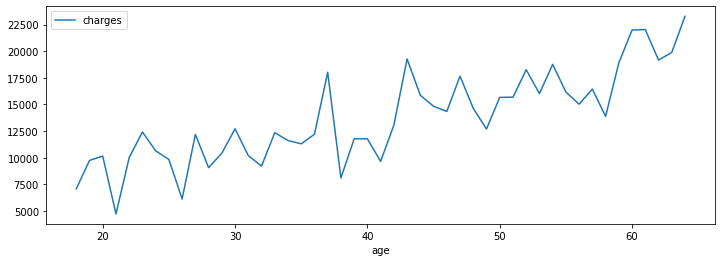

In [ ]:
### agreggate age and calculate charge averages and std dev for each ###

age_charge = insurance_data.groupby(['age']).charges.mean().reset_index()


min_age = age_charge.age.min() ### 18
max_age = age_charge.age.max() ### 64


age_charge.plot(x = 'age', y = 'charges', figsize=(12, 4))






The trend makes sense, as we get older, the insurance goes up, but something is weird here, why such deviation intensity? closeby ages shoudn't differ that much.

If this event comes from the influence of other variables, there are some cycles in which those variables change considerably, behaviour life cycles. Or the tunning is not well made.

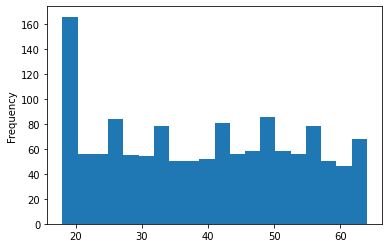

In [ ]:
age_distr = insurance_data.age
age_distr.plot.hist(bins = 20)

again some inconsistency, the age distribution show peaks periodicaly

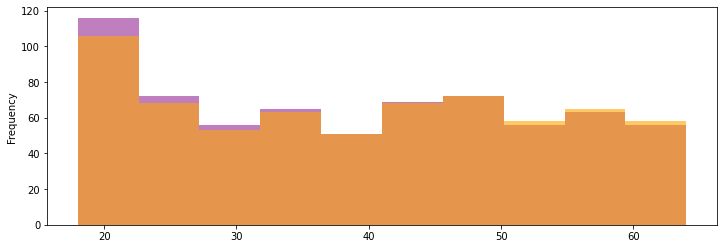

In [ ]:
age_male_distr = insurance_data[(insurance_data.sex == 'male')].age
age_male_distr.plot.hist(figsize=(12, 4), alpha = 0.5, color = 'purple')

age_female_distr = insurance_data[(insurance_data.sex == 'female')].age
age_female_distr.plot.hist(figsize=(12, 4), color = 'orange', alpha = 0.6)

*kkkkkk, it seems that men really dies earlier.*

Lets continue analyzing the distribution of our data relative to the other feats:

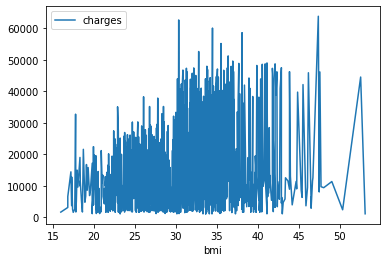

In [ ]:
### BMI vs charging cost ###
bmi_charge = insurance_data[['bmi', 'charges']]
bmi_charge_sorted = bmi_charge.sort_values(by = 'bmi')
bmi_charge_sorted.plot(x = 'bmi', y = 'charges')

There is a weak upwards general trend, but it seems that BMI is not that relevant to define de charging cost.

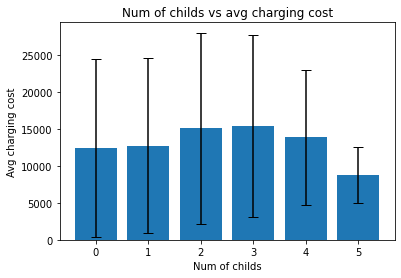

   children       charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247
   children       charges
0         0  12023.293942
1         1  11823.631451
2         2  12891.368347
3         3  12330.869484
4         4   9139.223321
5         5   3808.435525


In [ ]:
### Num of children vs charging cost ###
child_charge = insurance_data.groupby('children').charges.agg('mean').reset_index()
std_dev = insurance_data.groupby('children').charges.agg('std').reset_index()
plt.bar(data = child_charge, x = 'children', height = 'charges', yerr = std_dev['charges'], capsize = 5, ecolor = 'black', align = 'center')
plt.title('Num of childs vs avg charging cost')
plt.xlabel('Num of childs')
plt.ylabel('Avg charging cost')
plt.show()
print(child_charge)
print(std_dev)

It seems that the general trend is upwards, to explain the inconsistency of the last 2 bars, I would say that the data is scarce for those cases. \

Another concern here is the amplitude of the std deviation, it may imply that this variable is not that relevant in the charging cost determination.

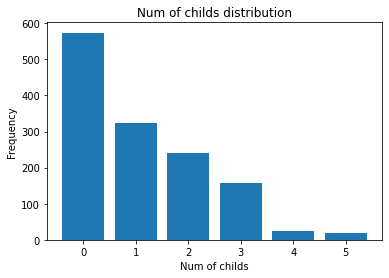

In [ ]:
### Num of childs distribution ###
num_child_distr_dict = {}
num_childs_list = insurance_data.children.unique()
num_childs_list.sort()

for number in num_childs_list:
  num_child_distr_dict[number] = insurance_data[insurance_data.children == number].children.count()



plt.bar(list(num_child_distr_dict.keys()), list(num_child_distr_dict.values()))
plt.title('Num of childs distribution')
plt.xlabel('Num of childs')
plt.ylabel('Frequency')
plt.show()

Less samples in the last cases is implying in inconsistency.

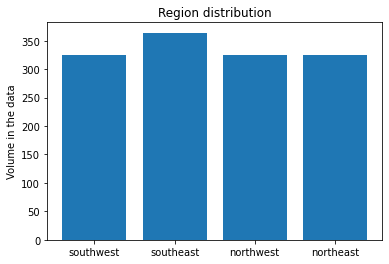

In [ ]:
### Plotting the region distribution ###
region_dict = {}
region_list = insurance_data.region.unique()

for region in region_list:
  region_dict[region] = insurance_data[insurance_data.region == region].region.count()
plt.close('all')
plt.bar(list(region_dict.keys()), list(region_dict.values()))
plt.title('Region distribution')
plt.ylabel('Volume in the data')
plt.show()

It would be interesting to know the actual population distribution through the regions and compare to verify if data is consistent.

In [ ]:
### plotting 

### Creating class instances for each person (ID)



In [ ]:
### Create a new column to identify each event (person) as an ID ###
insurance_data['id'] = range(len(insurance_data))

class Person:
  def __init__(self, id):
    self.id = id
    self.data = insurance_data[insurance_data.id == id]
    self.age = self.data.age
    self.sex = self.data.sex
    self.bmi = self.data.bmi
    self.children = self.data.children
    self.smoker = self.data.smoker
    self.region = self.data.region
    self.charges = self.data.charges
  
  def __repr__(self):
    return '{}'.format(self.id)

### Create a function to instantiate all ID's at once and store them inside a  list. ###
def get_class_list():
  class_list = []
  for i in range(len(insurance_data)):
    class_list.append(Person(i))
  return class_list

class_list = get_class_list()

### Top 75% charging cost


In [ ]:
### function to get the list of 4th quartile of client's charging cost ###
def get_75_expe():
  expe_list_75 = []
  for person in class_list:
    if person.charges.item() > np.quantile(insurance_data.charges, 0.75):
      expe_list_75.append(person.id)
  return expe_list_75

expe_75 = get_75_expe()

### How many smokers in 4th quartile? ###
count_smo_75 = 0
for id in expe_75:
  if class_list[id].smoker.item() == 'yes':
    count_smo_75 += 1

count_smo_75 / len(expe_75) # 76% of the 75th quartile are smokers #


### Calculate total number of smokers ###
count_smo = 0
for person in range(len(class_list)):
  if class_list[person].smoker.item() == 'yes':
    count_smo += 1

###

count_smo_75 / count_smo # 93% of the smokers are in the 75th quartile

0.9306569343065694

It seems that smoking is super relevant to the charging cost, let's dig in it to see how the general public average charging cost compares to smokers average charging cost for each age.

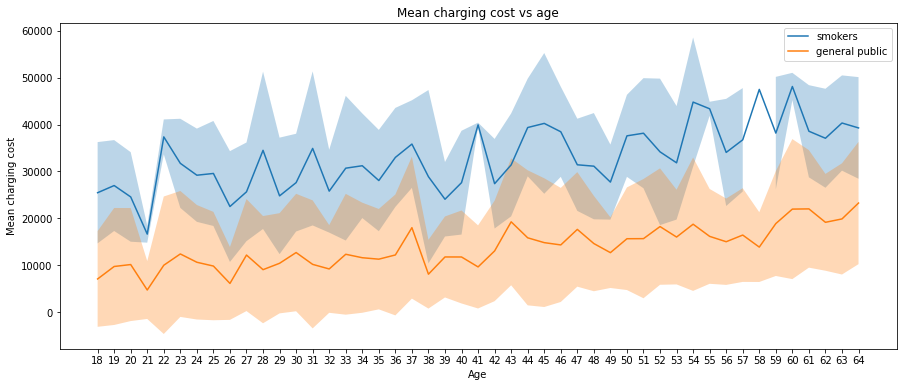

In [ ]:
### Calculate smokers mean charging cost ###
smoker_mean = 0
total_smo = 0
for person in range(len(class_list)):
  if class_list[person].smoker.item() == 'yes':
    total_smo += class_list[person].charges.item()

total = 0
for person in range(len(class_list)):
  total += class_list[person].charges.item()

smoker_mean = total_smo / count_smo
all_mean = total / len(class_list)

###

smoke_corr = (smoker_mean / all_mean) ### Comparing smokers mean charging cost to all persons mean's ###

### Creating two dictionaires that holds for key the age, and for value, a list containing the correspondent mean charging cost for general public and for smokers.

age_list = insurance_data['age'].unique()
age_list.sort()

### mean charging cost for each age (general public)
age_charge_mean_dict = {}
age_totals_dict = {}
age_quantity_dict = {}

for age in age_list:
  age_quantity = 0
  age_total = 0
  for id in range(len(class_list)):
    if class_list[id].age.item() == age:
      age_total += class_list[id].charges.item()
      age_quantity += 1
  age_totals_dict[age] = age_total
  age_quantity_dict[age] = age_quantity

for age, total in age_totals_dict.items():
  age_charge_mean_dict[age] = total / age_quantity_dict[age]

### mean charging cost for each age (smokers)
age_totals_smo_dict = {}
age_charge_mean_smo_dict = {}
age_quantity_smo_dict = {}

for age in age_list:
  age_total_smo = 0
  age_quantity_smo = 0
  for id in range(len(class_list)):
    if (class_list[id].age.item() == age) and (class_list[id].smoker.item() == 'yes'):
      age_total_smo += class_list[id].charges.item()
      age_quantity_smo += 1
  age_totals_smo_dict[age] = age_total_smo
  age_quantity_smo_dict[age] = age_quantity_smo


for age, total in age_totals_smo_dict.items():
  age_charge_mean_smo_dict[age] = total / age_quantity_smo_dict[age]

### plotting dictionaires

mean_smo_list = list(age_charge_mean_smo_dict.values())
mean_gen_list = list(age_charge_mean_dict.values())

std_dev_age_charge = insurance_data.groupby('age').charges.agg('std').reset_index().rename(columns = {'charges': 'std_charges'})
std_dev_age_charge_smo = insurance_data[insurance_data.smoker == 'yes'].groupby('age').charges.agg('std').reset_index().rename(columns = {'charges': 'std_charges'})


#std_dev_age_charge_smo = 


plt.close('all')

plt.figure(figsize=(15, 6))
plt.plot(range(len(mean_smo_list)), mean_smo_list, label = 'smokers')
plt.plot(range(len(mean_gen_list)), mean_gen_list, label = 'general public')
plt.fill_between(range(len(std_dev_age_charge_smo)), mean_smo_list - std_dev_age_charge_smo.std_charges, mean_smo_list + std_dev_age_charge_smo.std_charges, alpha = 0.3)
plt.fill_between(range(len(std_dev_age_charge)), mean_gen_list - std_dev_age_charge.std_charges, mean_gen_list + std_dev_age_charge.std_charges, alpha = 0.3)

plt.xticks(range(len(age_charge_mean_dict)), list(age_charge_mean_dict.keys()))
plt.title('Mean charging cost vs age')
plt.xlabel('Age')
plt.ylabel('Mean charging cost')
plt.legend()
plt.show()



Wow, let's inform the smokers that they are paying a much more higher average charging cost than the general public!

## Advisor Bot

I had this idea of developing a bot advisor to lower the insurance cost of an individual.

By utilising the comparative analyzes between the persons, the program is going to decide some to contact, based on their particularities.

What would the bot focus on to advise people? \

Which prediction it could also make in order to antecipate some events that could lead to a new contract? \

*   If the person is in the top 75% charging quartil, what could be made to lower the insurance?
*   How to predict the charging cost when given the other feats? (ML Linear Regression)
*   Advising the youngers about high insurance costs for smokers could lower future smokers smokers?
*   How to predict the best moment to market new contracts to protect new-born childs?

In [ ]:
### Advising smoking clients about their high average charging cost ###
for id in range(len(class_list)):
  if class_list[id].smoker.item() == 'yes':
    age = class_list[id].age.item()
    smo_div_non = age_charge_mean_smo_dict[age] / age_charge_mean_dict[age]
    print("Dear {}, do you know that smokers with your age pay, in average, {} times more than non-smokers? Probably, stop smoking would considerably lower you charging cost :)".format(class_list[id], smo_div_non))

## Predicting Charging Cost (ML)

Training a multi linear Regression Model to predict the charging cost when given the feats!

Coefficient determination for this model is: 0.7996633930323263


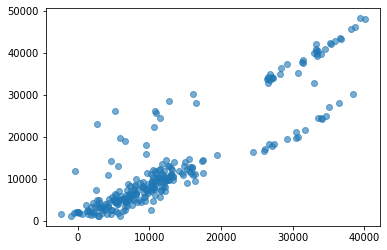

[264.5759108418987, 343.7571095046607, 541.3636717094239, 196.67244146346633, -196.67244146347366, -11778.496487245173, 11778.496487245166, 644.1947749096755, 182.42269768185932, -404.7011701081961, -421.91630248333774]
['age', 'bmi', 'children', 'female', 'male', 'no_smoker', 'yes_smoker', 'northeast', 'northwest', 'southeast', 'southwest']


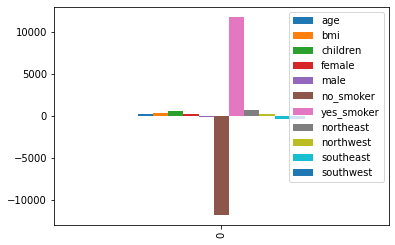

In [ ]:
x_columns = list(insurance_data.columns)
del x_columns[-2:]

x = insurance_data[x_columns] ### I still need to convert categorical variables into dummy ones

cat_x = x.select_dtypes(include=[object])

enc = preprocessing.OneHotEncoder()
enc.fit(cat_x)
encoded_arrays = enc.transform(cat_x).toarray()
cat_col = ['female', 'male', 'no_smoker', 'yes_smoker', 'northeast', 'northwest', 'southeast', 'southwest']

cat_data = pd.DataFrame(data = encoded_arrays, columns = cat_col)
x_no_cat = x[['age', 'bmi', 'children']]


new_x = pd.concat([x_no_cat, cat_data], axis = 1)


y = insurance_data['charges']



x_train, x_test, y_train, y_test = train_test_split(new_x, y, train_size = 0.8, test_size = 0.2, random_state = 11 )

charge_model = LinearRegression()
charge_model.fit(x_train, y_train)

charge_predict = charge_model.predict(x_test)

print('Coefficient determination for this model is:', charge_model.score(x_test, y_test))
plt.scatter(charge_predict, y_test, alpha = 0.6)
plt.show()

coef = list(charge_model.coef_)
coef_col = list(new_x.columns)
print(coef)
print(coef_col)

coef_data = pd.DataFrame([coef], columns = coef_col)
coef_data.plot.bar()


Predicting the best moment to offer new child contracts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   gender            1338 non-null   uint8  
 4   smoker            1338 non-null   uint8  
 5   region_northeast  1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(6)
memory usage: 39.3 KB
None
Coefficient determination for this model is: 0.7996633930323263


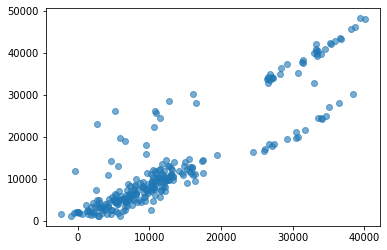

[264.57591084189903, 343.7571095046603, 541.3636717094261, -393.3448829269411, 23556.992974490353, 644.1947749096757, 182.42269768185935, -404.7011701081959, -421.9163024833375]
['age', 'bmi', 'children', 'gender', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


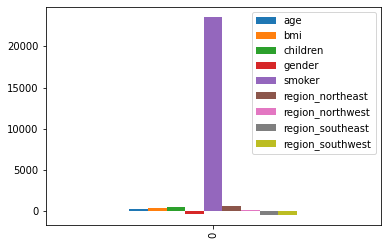

In [ ]:
x_columns = list(insurance_data.columns)
del x_columns[-2:]

x = insurance_data[x_columns] ### I still need to convert categorical variables into dummy ones

dum_x = pd.get_dummies(x, columns = ['sex', 'smoker', 'region'], prefix = ["sex","smoker","region"])
dum_x = dum_x.drop(['sex_female'], axis = 1)
dum_x = dum_x.drop(['smoker_no'], axis = 1)
dum_x = dum_x.rename(columns = {'sex_male': 'gender', 'smoker_yes': 'smoker'})

y = insurance_data['charges']

x_train, x_test, y_train, y_test = train_test_split(dum_x, y, train_size = 0.8, test_size = 0.2, random_state = 11 )

charge_model = LinearRegression()
charge_model.fit(x_train, y_train)

charge_predict = charge_model.predict(x_test)

print('Coefficient determination for this model is:', charge_model.score(x_test, y_test))
plt.scatter(charge_predict, y_test, alpha = 0.6)
plt.show()

coef = list(charge_model.coef_)
coef_col = list(dum_x.columns)
print(coef)
print(coef_col)

coef_data = pd.DataFrame([coef], columns = coef_col)
coef_data.plot.bar()


age
sex
bmi
children
smoker
region
charges